In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE

## SDSS Data Description

The dataset consists of 100,000 observations of celestial objects captured by the Sloan Digital Sky Survey (SDSS). Each observation is characterized by 17 feature columns and 1 class column, which categorizes the object as a star, galaxy, or quasar. https://classic.sdss.org/dr7/

- **obj_ID**: Object Identifier, a unique value that identifies the object in the image catalog used by the CAS.
- **alpha**: Right Ascension angle (at J2000 epoch).
- **delta**: Declination angle (at J2000 epoch).
- **u**: 355.1 nm filter in the photometric system.
- **g**: 468.6 nm filter in the photometric system.
- **r**: 616.5 nm filter in the photometric system.
- **i**: 748.1 nm filter in the photometric system.
- **z**: 893.1 nm filter in the photometric system.
- **run_ID**: Run Number used to identify the specific scan.
- **rereun_ID**: Rerun Number specifying how the image was processed.
- **cam_col**: Camera column to identify the scanline within the run.
- **field_ID**: Field number to identify each field.
- **spec_obj_ID**: Unique ID for optical spectroscopic objects. Two different observations with the same spec_obj_ID must share the output class.
- **class**: Object class (galaxy, star, or quasar object).
- **redshift**: Redshift value based on the increase in wavelength.
- **plate**: Plate ID, identifying each plate in SDSS.
- **MJD**: Modified Julian Date, indicating when a given piece of SDSS data was taken.
- **fiber_ID**: Fiber ID identifying the fiber that pointed the light at the focal plane in each observation.


In [16]:
# We start by reading the dataset 
df = pd.read_csv('star_classification.csv')

# Firstly we search for null values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [17]:
# Dataset characteristics
print(f'Shape: {df.shape}\n')
print(f'Data types:\n{df.dtypes}\n')

Shape: (100000, 18)

Data types:
obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object



In [18]:
# First 5 rows
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


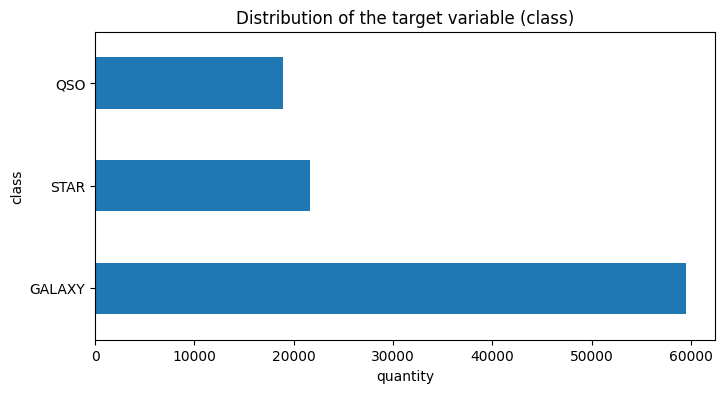

In [19]:
# We have a clearly unbalanced dataset
class_count = df['class'].value_counts()

# Bar chart
class_count.plot(kind='barh', title='Distribution of the target variable (class)', xlabel='quantity', ylabel='class', figsize=(8,4))
plt.show()

In [20]:
# We must convert class string values into numerical data
# 0 = GALAXY, 1 = QSO, 2 = STAR
df['class'] = pd.factorize(df['class'])[0]

In [21]:
# The columns useful to predict the class value are as follows
df_features = df.loc[:,['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']]

# Class to be predicted
df_target = df.loc[:,'class']

In [22]:
# Split data into train and test sets
# We shuffle the examples before splitting with random_state=0 for reproducibility
# Ensure same distributions of class outcomes with stratify=df_target (important with unbalanced datasets)
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.4, shuffle=True, random_state=0, stratify=df_target)

In [23]:
# We opt for min-max normalization to guarantee the same scales instead standardization
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

Value of k: 1, Accuracy: 0.920425
Value of k: 2, Accuracy: 0.9113
Value of k: 3, Accuracy: 0.9288
Value of k: 4, Accuracy: 0.9204
Value of k: 5, Accuracy: 0.925625
Value of k: 6, Accuracy: 0.91915
Value of k: 7, Accuracy: 0.922525
Value of k: 8, Accuracy: 0.918875
Value of k: 9, Accuracy: 0.92115
Value of k: 10, Accuracy: 0.91795
Value of k: 11, Accuracy: 0.91965
Value of k: 12, Accuracy: 0.916225
Value of k: 13, Accuracy: 0.917725
Value of k: 14, Accuracy: 0.9145
Value of k: 15, Accuracy: 0.9159
Value of k: 16, Accuracy: 0.9124
Value of k: 17, Accuracy: 0.914375
Value of k: 18, Accuracy: 0.911425
Value of k: 19, Accuracy: 0.913
Value of k: 20, Accuracy: 0.910475
Value of k: 21, Accuracy: 0.911875
Value of k: 22, Accuracy: 0.908725
Value of k: 23, Accuracy: 0.909625
Value of k: 24, Accuracy: 0.907025
Value of k: 25, Accuracy: 0.908275
Value of k: 26, Accuracy: 0.90595
Value of k: 27, Accuracy: 0.906975
Value of k: 28, Accuracy: 0.9047
Value of k: 29, Accuracy: 0.9054
Value of k: 30, Ac

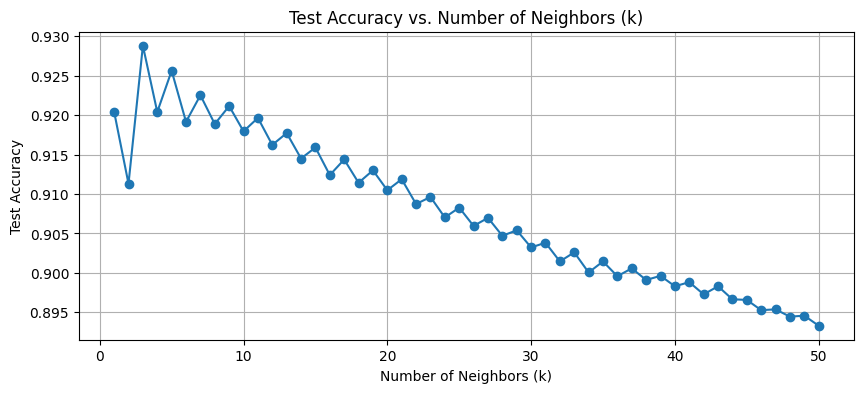

In [37]:
# Set up arrays to store test accuracy
neighbors = np.arange(1, 51)
test_accuracy = np.empty(len(neighbors))
tic = time.time()
for i, k in enumerate(neighbors):
    # Initialize the knn classifier with k neighbors (testing from 1 to 50)
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')  # Assuming euclidean distance. 
    # Use kd_tree to speed up the algorithm (too many examples for brute algorithm)

    # Train the model
    knn.fit(scaled_x_train, y_train)

    # Get accuracy on the test set
    test_accuracy[i] = knn.score(scaled_x_test, y_test)

    print(f'Value of k: {k}, Accuracy: {test_accuracy[i]}')

print(f'Time required: {time.time()-tic:.3f} s')

# Plotting test accuracy as a function of k
plt.figure(figsize=(10, 4))
plt.plot(neighbors, test_accuracy, label='Test Accuracy', marker='o')
plt.title('Test Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.grid()
plt.show()

In [41]:
# We configure our model with the best value of k
best_k = neighbors[test_accuracy.argmax()]
knn = KNeighborsClassifier(n_neighbors=best_k, algorithm='kd_tree')
knn.fit(scaled_x_train, y_train)
print(f'Best k = {best_k}\nTest Accuracy = {knn.score(scaled_x_test, y_test)}')

Best k = 3
Test Accuracy = 0.9288


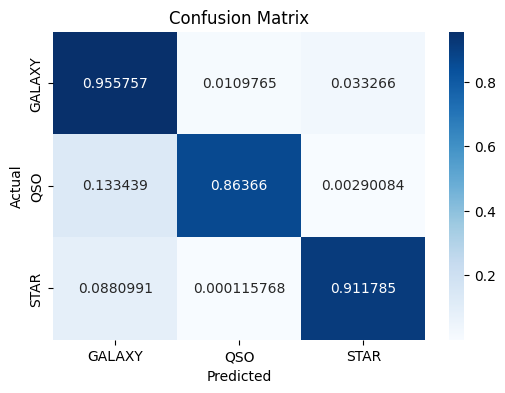

In [81]:
#  Computing the confusion matrix
y_pred = knn.predict(scaled_x_test)
cm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalized due to unbalanced dataset

# Class names
classes = ['GALAXY', 'QSO', 'STAR']

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
# We can obtain different metrics directly as follows
print(classification_report(y_test,y_pred, target_names=classes))

              precision    recall  f1-score   support

      GALAXY       0.93      0.96      0.94     23778
         QSO       0.96      0.86      0.91      7584
        STAR       0.91      0.91      0.91      8638

    accuracy                           0.93     40000
   macro avg       0.93      0.91      0.92     40000
weighted avg       0.93      0.93      0.93     40000



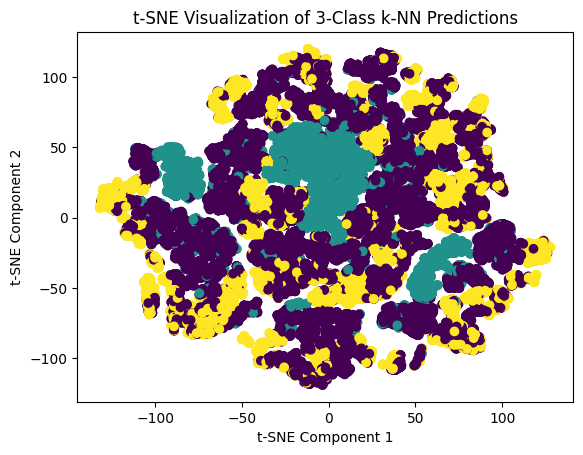

In [59]:
# We can reduce the dimensionality of the space with t-SNE algorithm and plot the results of our predictions
# However, not very useful results are obtained

# Initialize t-SNE with 2 components and a specific random state
tsne = TSNE(n_components=2, random_state=0)

# Transform the scaled test data to 2D using t-SNE
X_test_reduced = tsne.fit_transform(scaled_x_test)

# Create a scatter plot
scatter = plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred, cmap='viridis')

plt.title('t-SNE Visualization of 3-Class k-NN Predictions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.legend(handles=scatter.legend_elements()[0], labels=classes, title='Classes')
plt.show()

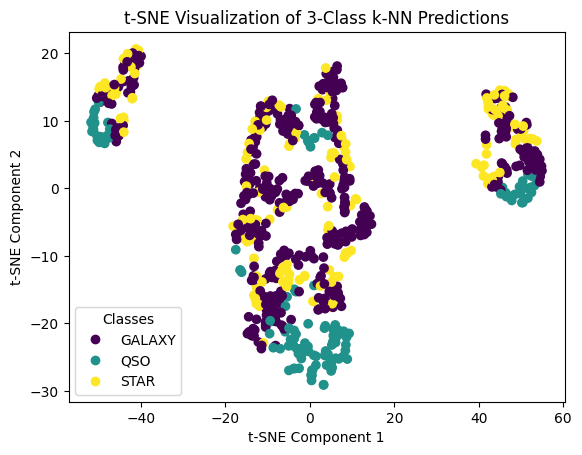

In [79]:
#  We can try to plot only a small number of points
tsne = TSNE(n_components=2, random_state=0)
miniset = scaled_x_test[:700]
X_test_reduced = tsne.fit_transform(miniset)


scatter = plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred[:700], cmap='viridis')

plt.title('t-SNE Visualization of 3-Class k-NN Predictions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.legend(handles=scatter.legend_elements()[0], labels=classes, title='Classes')
plt.show()